<div style="text-align:center; font-size:26px; color:green;">Teoría de medias móviles</div>

<div style="color:blue; text-align:left; font-size:16px; font-weight:bold;">Si no compartes el conocimiento no sirve para nada.<a href="https://www.youtube.com/watch?v=6rDxlolYUQw" target="_blank"> Michio Kaku</a></div>



In [ ]:
# Genera el índice del notebook
import urllib
import json

def generate_toc(notebook_path, indent_char="&emsp;"):
    is_markdown = lambda it: "markdown" == it["cell_type"]
    is_title = lambda it: it.strip().startswith("#") and it.strip().lstrip("#").lstrip()
    toc_numbers = [0, 0, 0, 0, 0, 0]  # Contadores para los niveles de títulos (hasta 6 niveles)
    
    with open(notebook_path, 'r') as in_f:
        nb_json = json.load(in_f)

    for cell in filter(is_markdown, nb_json["cells"]):
        for line in filter(is_title, cell["source"]):
            line = line.strip()
            level = line.count("#")
            toc_numbers[level - 1] += 1
            toc_number_str = ".".join(str(toc_numbers[i]) for i in range(level))
            indent = indent_char * (level - 1)
            title = line.lstrip("#").lstrip()
            url = urllib.parse.quote(title.replace(" ", "-"))
            out_line = f"{indent}{toc_number_str}. [{title}](#{url})<br>\n"
            print(out_line, end="")

notebook_path = '/media/enri/Mi_Proyecto/Py_Proyecto_2024/Trabajo_Trading-Gestion-Conservadora/Herramientas/Moving Average Theory_2.0.ipynb'
generate_toc(notebook_path, indent_char="&emsp;")

# Indice

1. [Conceptos básicos sobre Medias Móviles.](#Conceptos-b%C3%A1sicos-sobre-Medias-M%C3%B3viles.)<br>
&emsp;1.1. [Importación de módulos](#Importaci%C3%B3n-de-m%C3%B3dulos)<br>
&emsp;1.2. [Importación de cotizaciones](#Importaci%C3%B3n-de-cotizaciones)<br>
&emsp;1.3. [Funciones para importar cotizaciones y calcular retornos.](#Funciones-para-importar-cotizaciones-y-calcular-retornos.)<br>
&emsp;1.4. [Clase CalculaRetornos.](#Clase-CalculaRetornos.)<br>
&emsp;1.5. [Gráfico de velas.](#Gr%C3%A1fico-de-velas.)<br>
&emsp;&emsp;1.5.1. [Gráfico de velas con mplfinance.](#Gr%C3%A1fico-de-velas-con-mplfinance.)<br>
&emsp;&emsp;1.5.2. [Gráfico de velas con plotly](#Gr%C3%A1fico-de-velas-con-plotly)<br>
2. [Risk free calculation](#Risk-free-calculation)<br>
3. [Medias móviles](#Medias-m%C3%B3viles)<br>
&emsp;3.6. [Medias Móviles Simples (SMA).](#Medias-M%C3%B3viles-Simples-%28SMA%29.)<br>
&emsp;&emsp;3.6.3. [Función para calcular y graficar  la SMA](#Funci%C3%B3n-para-calcular-y-graficar--la-SMA)<br>
&emsp;&emsp;3.6.4. [Función para calcular y graficar  la EMA](#Funci%C3%B3n-para-calcular-y-graficar--la-EMA)<br>
&emsp;&emsp;3.6.5. [Clase para calcular y graficar la SMA.](#Clase-para-calcular-y-graficar-la-SMA.)<br>
&emsp;&emsp;3.6.6. [SMA utilizando Talib](#SMA-utilizando-Talib)<br>
&emsp;&emsp;3.6.7. [Gráfica con Ploty](#Gr%C3%A1fica-con-Ploty)<br>
&emsp;3.7. [Medias Móviles Exponenciales (EMA's)](#Medias-M%C3%B3viles-Exponenciales-%28EMA%27s%29)<br>
&emsp;&emsp;3.7.8. [Función para calcular y graficar la EMA.](#Funci%C3%B3n-para-calcular-y-graficar-la-EMA.)<br>
&emsp;&emsp;3.7.9. [Clase para calcular y graficar la EMA.](#Clase-para-calcular-y-graficar-la-EMA.)<br>
&emsp;3.8. [Resúmen de llamadas a las funciones anteriores.](#Res%C3%BAmen-de-llamadas-a-las-funciones-anteriores.)<br>
&emsp;3.9. [Modelo de estrategia con el cruce de una media móvil.](#Modelo-de-estrategia-con-el-cruce-de-una-media-m%C3%B3vil.)<br>
&emsp;3.10. [Modelo de estrategia con el cruce de dos mediaws móviles.](#Modelo-de-estrategia-con-el-cruce-de-dos-mediaws-m%C3%B3viles.)<br>
&emsp;3.11. [Otro modelo](#Otro-modelo)<br>
4. [Filter the DataFrame to keep only the rows where the position changes.](#Filter-the-DataFrame-to-keep-only-the-rows-where-the-position-changes.)<br>
&emsp;&emsp;4.11.10. [Rendimiento de la estrategia.](#Rendimiento-de-la-estrategia.)<br>



# Conceptos básicos sobre Medias Móviles.

**Si no compartes el conocimiento no sirve para nada.** [Michio Kaku](https://www.youtube.com/watch?v=6rDxlolYUQw)

[How to Backtest your First Trading Strategy in Python](https://raposa.trade/blog/how-to-backtest-your-first-trading-strategy-in-python/)
[Algorithmic-Trading-with-Python](https://github.com/Nikhil-Adithyan/Algorithmic-Trading-with-Python/tree/main/Momentum)

SMA Trading Startegies

[Generating Buy and Sell Signals for SMA, MACD, and Bollinger-Bands with Python](https://tradewithpython.com/generating-buy-sell-signals-using-python)

https://medium.datadriveninvestor.com/unleashing-the-power-of-momentum-trading-with-python-b878b7b5f805

[stackoverflow](https://es.stackoverflow.com/questions/548054/identificar-los-puntos-en-los-que-cambia-el-valor-de-una-columna-en-un-dataframe)
data.Position.diff().replace({-1.0: "Buy", 1.0: "Sell", 0.0: "Hold"})

## Importación de módulos

In [2]:
import math
from math import floor
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime 
import datetime as dt
import matplotlib.pyplot as plt
#from termcolor import colored as cl
#import plotly.express as px
from chart_studio import plotly as px
#from plotly.offline import iplot
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('fivethirtyeight')


## Importación de cotizaciones

Importamos cotizaciones utilizando la función `get_quotes()`, para lo que tendremos que definir previamente los siguientes parámetros.

* ticker  
* value_name  
* start_date  
* end_date  
* end = date.today()  # fecha actual.

Para el cálculo de retornos, utilizaremos la función `calculate_value_returns(df)`.

Para consultar otras opciones de importación de cotizaciones, ver notebook `Quote import options-2.0.ipynb` en la carpeta `./Gestion-Conservadora-de-Activos_Financieros/Strategies tools`

## Funciones para importar cotizaciones y calcular retornos.
<font color='blue'>Funciones para importar cotizaciones y calcular retornos del valor.</font>

### Función para importar cotizaciones.

In [3]:
def download_quotes(ticker, start_date, end_date):
    # Crear el objeto Ticker para el símbolo deseado
    ticker = yf.Ticker("AAPL")
    value_name = ticker

    # Obtener el historial de precios utilizando la función history()
    df_closes = ticker.history(start= start_date, end="2019-10-23")

    # Formatear el índice como "yy-mm-dd"
    df_closes.index = df_closes.index.strftime('%y-%m-%d')

    # Convertir nuevamente el índice a un objeto DatetimeIndex
    df_closes.index = pd.to_datetime(df_closes.index, format='%y-%m-%d')
     
    df_close = df_closes[['Close']].copy(deep=True) 
    
    return df_closes, df_close, value_name

start_date = "2010-01-04"
end_date = "2019-10-23"
ticker = '^IBEX'

df_closes, df_close, value_name = download_quotes(ticker, start_date, end_date)

print (df_closes.info(), df_close.info(), value_name)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2010-01-04 to 2019-10-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2468 non-null   float64
 1   High          2468 non-null   float64
 2   Low           2468 non-null   float64
 3   Close         2468 non-null   float64
 4   Volume        2468 non-null   int64  
 5   Dividends     2468 non-null   float64
 6   Stock Splits  2468 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 154.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2010-01-04 to 2019-10-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2468 non-null   float64
dtypes: float64(1)
memory usage: 38.6 KB
None None yfinance.Ticker object <AAPL>


### Funciones para importar cotizaciones y calcular retornos.

In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import date

def download_quotes(ticker, start_date, end_date):
    # Crear el objeto Ticker para el símbolo deseado
    ticker = yf.Ticker("AAPL")
    value_name = ticker

    # Obtener el historial de precios utilizando la función history()
    df_closes = ticker.history(start= start_date, end="2019-10-23")

    # Formatear el índice como "yy-mm-dd"
    df_closes.index = df_closes.index.strftime('%y-%m-%d')

    # Convertir nuevamente el índice a un objeto DatetimeIndex
    df_closes.index = pd.to_datetime(df_closes.index, format='%y-%m-%d')
     
    df_close = df_closes[['Close']].copy(deep=True) 
    
    return df_closes, df_close, value_name

def calculate_variations(df_close, nom_val):
    df_returns = df_close.copy(deep=True) 
    df_returns["Variations"] = df_returns['Close'].diff()
    
    #df_returns['Variations1'] = df_close[nom_val] - df_close[nom_val].shift()  
    df_returns['cum_variations'] = df_returns['Variations'].cumsum()
    
    """Podemos utilizar: **returns & cumprod** ó **log returns & cumsum**."""
    #df_returns['Daily_returns'] = df_returns[nom_val].pct_change()
    df_returns['Daily_returns'] = np.log(df_returns['Close']/df_returns['Close'].shift()) 
    df_returns['Cum_daily_returns'] = df_returns[['Daily_returns']].cumsum().apply(np.exp)
    df_returns["Log_returns"] = np.log(df_returns['Close']/df_returns['Close'].shift(1)).dropna() 
    
    # # Cálculo de los retornos acumulados usando los retornos simples.
    df_returns["Cum_log_returns"]  = df_returns["Log_returns"].cumsum().apply(np.exp)    
    return df_returns

def test_run():
    ticker = 'AAPL'
    start_date = "2016-01-04"
    end_date = "2021-12-31"
    #end_date = date.today()

    # Importar cotizaciones
    df_closes, df_close, value_name =  download_quotes(ticker, start_date, end_date)
    
    # Cálculo de retornos
    df_returns = calculate_variations(df_close, value_name)
    return df_closes, df_close, value_name, df_returns 

if __name__ == "__main__":
    df_closes, df_close, value_name, df_returns = test_run()

df_returns[:3] 
 

Close  Variations  cum_variations  Daily_returns  \
Date                                                               
2016-01-04  23.977474         NaN             NaN            NaN   
2016-01-05  23.376619   -0.600855       -0.600855      -0.025378   
2016-01-06  22.919146   -0.457474       -1.058329      -0.019764   

            Cum_daily_returns  Log_returns  Cum_log_returns  
Date                                                         
2016-01-04                NaN          NaN              NaN  
2016-01-05           0.974941    -0.025378         0.974941  
2016-01-06           0.955862    -0.019764         0.955862

<font color='blue'>La clase CalculaRetornos que se muestra a continuación, se encarga de calcular los retornos y variaciones de un valor financiero utilizando datos históricos descargados de Yahoo Finance.</font>

### Clase para importar cotizaciones y calcular CalculaRetornos.
Clase para importar cotizaciones y calcular retornos del valor.

In [5]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import date

class Calcula_retornos:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.value_name = None
        self.df_closes = None
        self.df_close = pd.DataFrame()
        self.df_returns = pd.DataFrame()

    def download_quotes(self):
        # Crear el objeto Ticker para el símbolo deseado
        ticker = yf.Ticker(self.ticker)  # Usar el símbolo proporcionado
        self.value_name = self.ticker

        # Obtener el historial de precios utilizando la función history()
        self.df_closes = ticker.history(start=self.start_date, end=self.end_date)

        # Formatear el índice como "yy-mm-dd"
        self.df_closes.index = self.df_closes.index.strftime('%y-%m-%d')

        # Convertir nuevamente el índice a un objeto DatetimeIndex
        self.df_closes.index = pd.to_datetime(self.df_closes.index, format='%y-%m-%d')

        self.df_close = self.df_closes[['Close']].copy(deep=True)

        return self.df_closes, self.df_close, self.value_name

    def calculate_variations(self):
        self.df_returns = self.df_close.copy(deep=True)
        self.df_returns["Variations"] = self.df_returns['Close'].diff()
        self.df_returns['cum_variations'] = self.df_returns['Variations'].cumsum()
        self.df_returns['Daily_returns'] = np.log(self.df_returns['Close'] / self.df_returns['Close'].shift())
        self.df_returns['Cum_daily_returns'] = self.df_returns[['Daily_returns']].cumsum().apply(np.exp)
        self.df_returns["Log_returns"] = np.log(self.df_returns['Close'] / self.df_returns['Close'].shift(1)).dropna()
        self.df_returns["Cum_log_returns"] = self.df_returns["Log_returns"].cumsum().apply(np.exp)

        return self.df_returns

def test_run():
    ticker_val = 'AAPL'
    start_date = "2016-01-04"
    end_date = "2021-12-31"

    calc_ret = Calcula_retornos(ticker_val, start_date, end_date)
    df_closes, df_close, value_name = calc_ret.download_quotes()
    df_returns = calc_ret.calculate_variations()

    return df_closes, df_close, value_name, df_returns

if __name__ == "__main__":
    df_closes, df_close, value_name, df_returns = test_run()

    print(df_close.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2016-01-04 to 2021-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1510 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB
None


## Gráficos de velas.
<font color='blue'>Un gráfico de velas, también conocido como gráfico candlestick, es una representación visual utilizada en el análisis técnico para mostrar la fluctuación de precios de un activo financiero, como acciones, divisas o commodities, a lo largo de un período de tiempo determinado.<br>
Las **velas** individuales que representan la actividad de precios durante un intervalo específico, como un día, una semana o un mes. Cada vela tiene una **cuerpo** y **mechas** o **sombras** en la parte superior e inferior.<br>  
El cuerpo de la vela muestra la diferencia entre el precio de apertura y el precio de cierre durante el período. Si el precio de cierre es más alto que el precio de apertura, el cuerpo de la vela se muestra generalmente en color verde o blanco, indicando un movimiento alcista. Por el contrario, si el precio de cierre es más bajo que el precio de apertura, el cuerpo de la vela se muestra generalmente en color rojo o negro, indicando un movimiento bajista.<br>  
Las mechas o sombras representan los rangos de precios más altos y más bajos alcanzados durante el período. La mecha superior muestra el precio máximo alcanzado, mientras que la mecha inferior muestra el precio mínimo alcanzado.  
Los gráficos de velas proporcionan información visual sobre la volatilidad, la dirección de la tendencia y los niveles de soporte y resistencia en el mercado. Los patrones de velas específicos, como el doji, el martillo, la envolvente, entre otros, pueden proporcionar señales sobre posibles cambios en la dirección de los precios.</font>

### Gráfico de velas con mplfinance.

<font color='blue'>Instalamos el paquete `conda install -c conda-forge mplfinance`, que proporciona funcionalidades para trazar gráficos de velas en Python.</font>


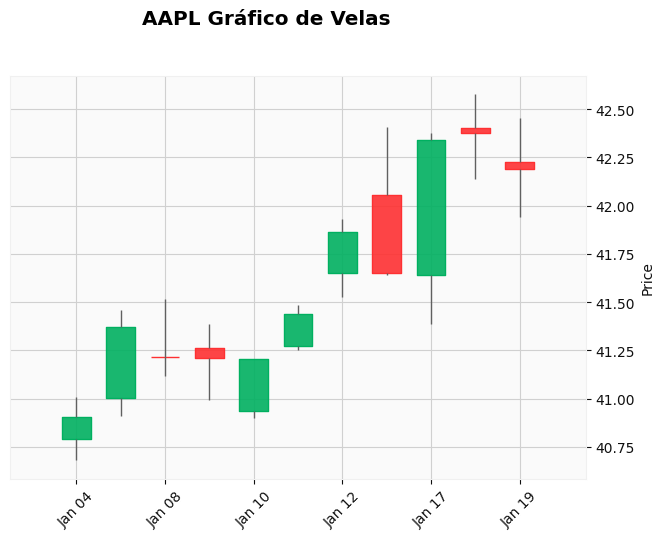

In [6]:
import matplotlib.pyplot as plt
import mplfinance as mpf

# Convertir el índice a un objeto DatetimeIndex
df_closes.index = pd.to_datetime(df_closes.index)

# Ordenar el DataFrame por el índice de fechas
df_closes = df_closes.sort_index()

# Seleccionar un rango de fechas utilizando loc
df_closes = df_closes.loc['2018-01-04':'2018-01-20']

# Crear el gráfico de velas
mpf.plot(df_closes, type='candle', style='yahoo', title=value_name + ' Gráfico de Velas')

# Mostrar el gráfico
plt.show()



<div style="background-color: lightyellow; padding: 10px;">
    
**<u>Observaciones:</u><br>**<br>
Si las fechas no existen en el DataFrame, devolverá el error `/tmp/ipykernel_8010/641114363.py:6: FutureWarning` Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.'. Es necesario asegurarse de que las fechas están incluidas en el índice de filas del DataFrame.</dev>

### Gráfico de velas con plotly 

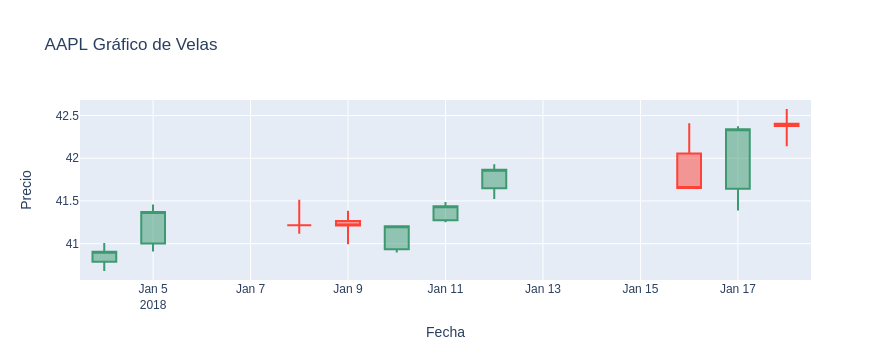

In [7]:
import plotly.graph_objects as go

# Convertir el índice a un objeto DatetimeIndex
df_closes.index = pd.to_datetime(df_closes.index)

# Ordenar el DataFrame por el índice de fechas
df_closes = df_closes.sort_index()

# Seleccionar un rango de fechas utilizando loc
df_closes = df_closes.loc['2018-01-04':'2018-01-18', :]

# Crear una figura de Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df_closes.index,  # Utilizar el índice de fechas como valores x
    open=df_closes['Open'],
    high=df_closes['High'],
    low=df_closes['Low'],
    close=df_closes['Close']
)])

# Personalizar el diseño del gráfico
fig.update_layout(
    title=value_name + ' Gráfico de Velas',
    xaxis_title='Fecha',
    yaxis_title='Precio',
)

fig.update_layout(xaxis_rangeslider_visible=False)

# Mostrar el gráfico
fig.show()


<div style="background-color: lightyellow; padding: 10px;">
    
**<u>Observaciones:</u><br>**  
Si las fechas no existen en el DataFrame, devolverá el error '/tmp/ipykernel_8010/641114363.py:6: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.'. Es necesario asegurarse de que las fechas están incluidas en el índice de filas del DataFrame.</dev>

# Risk free calculation

[Investopedia. Risk-Free Rate of Return](https://www.investopedia.com/terms/r/risk-freerate.asp)

[Looking for risk free rates with pythonLooking for risk free rates with python](https://pass456.medium.com/looking-for-risk-free-rates-with-python-80f23e47e70a)

<font color='blue'>La Tasa Libre de Riesgo es la rentabilidad que se obtiene al invertir en un activo que se considera que es cien por cien seguro y, por tanto, está libre de riesgo.</font>

In [8]:
# Cálculo de la tasa libre de riesgo. 
# Rendimiento del Tesoro 10 Años (^TNX) 

""" Ultimo valor de la tasa libre de riesgo a 10 años de EE.UU, en tanto por uno, 
el ticker corresponde a: ^TNX"""

def get_risk_free_rate(start_day, end_day) :
    ticker = '^TNX'
    risk_free_rate = yf.download(ticker, start= start_date, end = end_date, progress=False) ['Adj Close'] 
    return risk_free_rate

start_date = '2010-1-4' 
end_date = '2023-6-20'
risk_free_rate = get_risk_free_rate(start_date, end_date)
rfr = risk_free_rate[-1] 
rfr

3.7690000534057617

[European Government Bonds](https://www.investing.com/rates-bonds/european-government-bonds)

# Medias móviles

## Medias Móviles Simples (SMA).

**Referencias:**

[Indicadores Técnicos Quantisti](https://blog.quantinsti.com/build-technical-indicators-in-python/)

[(SMA. Investopedia)](https://www.investopedia.com/terms/s/sma.asp) [(SMA. Investopedia)](https://www.investopedia.com/terms/s/sma.asp) 

https://medium.datadriveninvestor.com/unleashing-the-power-of-momentum-trading-with-python-b878b7b5f805

Para la estrategia ver https://www.learnpythonwithrune.org/backtesting-a-trading-strategy-with-pandas-and-python/

<font color='blue'>Para implementar una estrategia de impulso de promedio móvil, los inversores pueden usar una variedad de indicadores de promedio móvil `(MA's)` diferentes como, promedios móviles simples `(SMA)`, promedios móviles exponenciales `(EMA)`o promedios móviles ponderados, para identificar tendencias de impulso y tomar decisiones de compra o venta. Por ejemplo, un inversor podría utilizar una media móvil de 150 días para identificar la dirección de la tendencia subyacente del precio de una acción y comprar la acción si se cotiza por encima de la media móvil, o vender la acción si se cotiza por debajo de la media móvil.<br> <br>
Una ventaja clave de usar `MA's` en una estrategia de impulso es que pueden ayudar a suavizar las fluctuaciones de precios a corto plazo y brindar una imagen más clara de la tendencia subyacente del precio de un activo. Además, las `MA's` son relativamente simples de calcular e interpretar, lo que los convierte en una opción popular entre los inversores que buscan un indicador técnico fácil de usar.<br><br>
La `Simple Moving Average (SMA)` es una medida que calcula el promedio de un conjunto de precios, generalmente precios de cierre, durante un período determinado. Se utiliza en el análisis técnico para determinar si un activo está en una tendencia alcista o bajista. La `SMA` se basa en la media aritmética de `x` datos anteriores, y su influencia depende del número de períodos considerados. Cuanto mayor sea el número de períodos, mayor será la influencia de los datos antiguos en el cálculo. Por otro lado, si se selecciona un número bajo de períodos, los datos más recientes tendrán mayor peso en la predicción.</font>

In [9]:
ticker_val = 'AAPL'
start_date = "2010-01-04"
end_date = "2019-10-29"

calc_ret = Calcula_retornos(ticker_val, start_date, end_date)
df_closes, df_close, value_name = calc_ret.download_quotes()
df_returns = calc_ret.calculate_variations()
df_close.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2472 entries, 2010-01-04 to 2019-10-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2472 non-null   float64
dtypes: float64(1)
memory usage: 38.6 KB


### Función para calcular y graficar  la SMA 

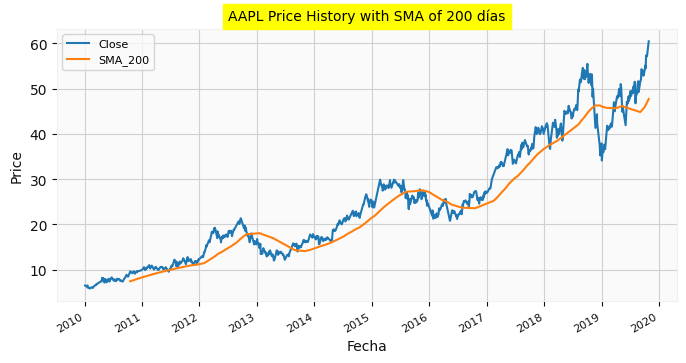

In [10]:
# Función para calcular la SMA
def get_SMA(df, n, value_name):
    EMA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='SMA_' + str(n))
    df = df.join(EMA)
    return df 

def get_SMA_plot( df_sma, n):   
    df_sma.plot(figsize = (8, 4), lw=1.5);  

    plt.title(value_name + f" Price History with SMA of {periods} días",fontsize=10, backgroundcolor='yellow')
    plt.xlabel('Fecha',fontsize=10)
    plt.ylabel('Price',fontsize=10)
    plt.legend(loc='upper left',fontsize=8)

    # Ajustar tamaño de las fechas en la escala x
    plt.gca().xaxis.set_tick_params(labelsize=8)

    # Ajustar tamaño de los números en la escala y
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.show()    

periods = 200
df = df_close.copy()
df_sma = get_SMA(df, periods, value_name)

# Plot graphic
get_SMA_plot(df_sma, periods )
 


### Función para calcular y graficar  la EMA 

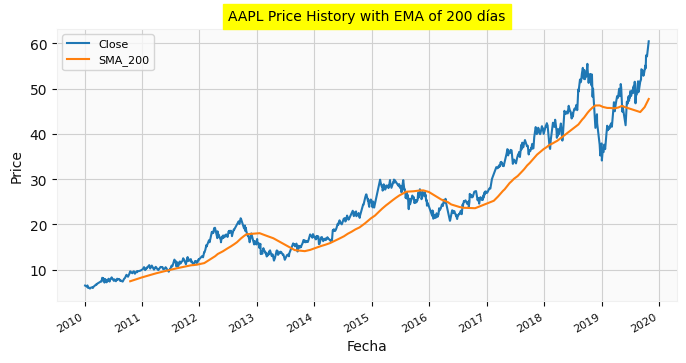

In [11]:
# Función para calcular la EMA
def get_EMA(df_sma, n, value_name):
    EMA = pd.Series(df_sma['Close'].ewm(span=n, adjust=False).mean(), name='EMA_' + str(n))
    df_sma = df_sma.join(EMA)
    return df_sma 

def get_EMA_plot( df_ema, n):   
    df_ema.plot(figsize = (8, 4), lw=1.5);  

    plt.title(value_name + f" Price History with EMA of {periods} días",fontsize=10, backgroundcolor='yellow')
    plt.xlabel('Fecha',fontsize=10)
    plt.ylabel('Price',fontsize=10)
    plt.legend(loc='upper left',fontsize=8)

    # Ajustar tamaño de las fechas en la escala x
    plt.gca().xaxis.set_tick_params(labelsize=8)

    # Ajustar tamaño de los números en la escala y
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.show()    

periods = 200
df_ema = df_close.copy()
df_ema = get_SMA(df_ema, periods, value_name)

# Plot graphic
get_EMA_plot(df_ema, periods )
 


### Clase para calcular y graficar la SMA.

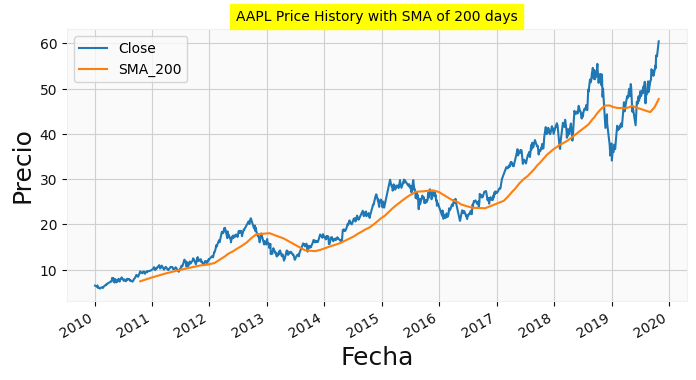

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


class calcula_plot_SMA:
    def __init__(self, df, value_name, periods):
        self.df = df
        self.value_name = value_name
        self.periods = periods

    def get_SMA(self, n):
        SMA = pd.Series(self.df['Close'].rolling(n, min_periods=n).mean(), name='SMA_' + str(n))
        self.df = self.df.join(SMA)
        return self.df

    def plot_SMA(self):
        df_sma = self.get_SMA(self.periods)
        
        df_sma.plot(figsize=(8, 4), lw=1.5)
        
        plt.title(self.value_name + f" Price History with SMA of {self.periods} days", fontsize=10, backgroundcolor='yellow')
        plt.xlabel('Fecha', fontsize=18)
        plt.ylabel('Precio', fontsize=18)
        plt.legend(loc='upper left')
        plt.show()


# Parámetros
periods = 200

calcula_sma = calcula_plot_SMA(df_close, value_name, periods)
calcula_sma.plot_SMA()



### SMA utilizando Talib
<font color='blue'>TA-Lib (Technical Analysis Library) es una biblioteca de análisis técnico de código abierto ampliamente utilizada en finanzas y trading. Proporciona funciones para realizar una variedad de análisis técnico en datos financieros, como series temporales de precios de acciones. TA-Lib ofrece una amplia gama de indicadores técnicos y herramientas de análisis, incluyendo medias móviles, bandas de Bollinger, RSI (Índice de Fuerza Relativa), MACD (Convergencia/Divergencia de Medias Móviles), y muchos más.</font>  

Una alternativa a Talib es [pandas ta](https://github.com/twopirllc/pandas-ta)

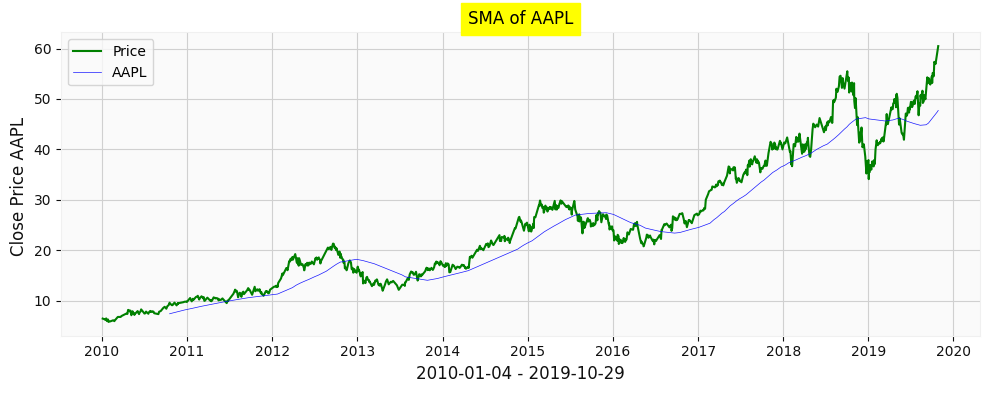

In [13]:
import talib as tb
#  SMA usando Talib
SMA = tb.SMA(df_close['Close'], timeperiod=200)

# Crear un DataFrame df_sma con la columna 'SMA'
df_sma = pd.DataFrame(index=df_close.index)  # Asegúrate de que el índice coincida
df_sma['SMA'] = SMA

# Gráfica de cotizaciones y SMA.
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df_close['Close'], color='green', label='Price', lw=1.5)
ax.plot(SMA , label = value_name ,linewidth=0.5, color='blue', alpha = 0.9 )
ax.set_title('SMA of '+ value_name,fontsize=10, backgroundcolor='yellow')
ax.set_xlabel(f'{start_date} - {end_date}' ,fontsize=12)
ax.set_ylabel(f'Close Price {value_name} ' , fontsize=12)
legend = ax.legend(loc='upper left')
ax.grid(visible = True)
plt.tight_layout()

# Personalizar la gráfica
ax.legend(loc='upper left')
ax.set_title(f'SMA of {value_name}')

plt.show()

### Gráfica con Ploty

In [14]:
#  SMA usando Talib
SMA = tb.SMA(df_close['Close'], timeperiod=200)

# Crear un DataFrame df_sma con la columna 'SMA'
df_sma = pd.DataFrame(index=df_close.index)  # Asegúrate de que el índice coincida
df_sma['SMA'] = SMA
df_sma[:3]

SMA
Date           
2010-01-04  NaN
2010-01-05  NaN
2010-01-06  NaN

Se necesitan credenciales de autenticación para Plotly. Para solucionar esto, debemos configurar las credenciales de Plotly antes de intentar trazar gráficos con Chart Studio.

Sigue estos pasos para configurar tus credenciales de Plotly:

* Crear una cuenta en Plotly (si no tienes una):
    Si aún no tienes una cuenta en Plotly, ve al sitio web de Plotly (https://chart-studio.plotly.com/) y crea una cuenta.

* Obtener tus credenciales:
    Después de crear la cuenta, inicia sesión y ve a la página de configuración de la cuenta (https://chart-studio.plotly.com/settings/api/) para obtener tus credenciales API. Allí encontrarás tu nombre de usuario y clave API.

* Configurar las credenciales en tu código:
    Antes de ejecutar el código, agrega las siguientes líneas al inicio de tu script o celda de Jupyter Notebook:

Código para la authentication.

    import chart_studio.plotly as py
    
    py.plotly.set_credentials("YOUR_AUTHENTICATION_TOKEN")


In [15]:
# Configurar las credenciasles plotly.
import plotly.graph_objs as go
import chart_studio
import chart_studio.plotly as py

# Crea un gráfico de líneas con los datos del precio y la SMA
trace_price = go.Scatter(x=df_close.index, y=df_close['Close'], mode='lines', name='Price', line=dict(color='green', width=1.5))
trace_sma = go.Scatter(x=SMA.index, y=SMA, mode='lines', name=value_name, line=dict(color='blue', width=0.5))

# Define el diseño del gráfico
layout = go.Layout(
    title=f'SMA of {value_name}',
    xaxis=dict(title=f'{start_date} - {end_date}'),
    yaxis=dict(title=f'Close Price {value_name}'),
    legend=dict(x=0, y=1, traceorder='normal'),
    plot_bgcolor='white',
    showlegend=True
)

# Crea la figura del gráfico
fig = go.Figure(data=[trace_price, trace_sma], layout=layout)

# Muestra el gráfico
py.iplot(fig)




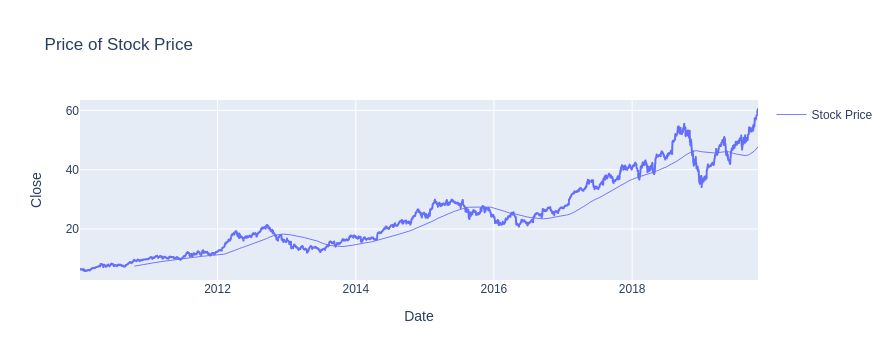

In [16]:
import pandas as pd
import plotly.express as px

# Calculate the SMA
SMA = tb.SMA(df_close['Close'], timeperiod=200)

# Trim the SMA DataFrame to the same length as the close DataFrame
df_sma = df_sma.iloc[:len(df_close)]

# Plot the data
value_name = 'Stock Price'  # Replace with actual value name

fig = px.line(df_close, x=df_close.index, y='Close', title=f'Price of {value_name}')
fig.add_trace(go.Scatter(x=df_sma.index, y=df_sma['SMA'], mode='lines', name=value_name, line=dict(color='blue', width=0.5)))
fig.show()


## Medias Móviles Exponenciales (EMA's)

[Moving Average Trading Strategy](https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/ )

Es fácil observar que las series de tiempo de la media móvil simple `SMA` son mucho menos ruidosas que las series de tiempo del precio original. Sin embargo, esto tiene un costo: las series de tiempo de la `SMA` se retrasan con respecto a las series de tiempo del precio original, lo que significa que los cambios en la tendencia se ven con un retraso de varios días. ¿De cuánto es este retraso?

Para una media móvil simple (SMA) calculada utilizando días, el retraso es aproximadamente de días, lo que puede afectar significativamente nuestra estrategia.

la `EMA` es una técnica de suavizado que asigna un mayor peso a los datos más recientes. Permite reducir el retraso en comparación con la `SMA` y reaccionar más rápidamente a los cambios en los datos. El parámetro de decaimiento `α` y la longitud de la ventana `M` determinan la rapidez con la que la `EMA` responde a los cambios en los datos.

Una forma de reducir el retraso inducido por el uso de la `SMA` es utilizar la llamada media móvil exponencial `EMA`, definida como:

$$EMA(t) = (1 - \alpha)EMA(t+1) + (\alpha p(t)$$

$$EMA(T_0) = p(t_0)$$

donde `p(t)` es el precio en el tiempo y alpha es llamado el parámetro de decaimiento para la `EMA`. `Alpha` está relacionado con el retraso de la siguiente manera:

$$\alpha = \frac {1}{L+1}$$

y la longitud de la ventana `span` M como:

$$\alpha = \frac {2}{M+1}$$

La fórmula muestra que el valor de la `EMA` en el tiempo `t` se calcula como una combinación del valor de la `EMA` en el tiempo `t+1` y el precio en el tiempo `t`, ponderados por el parámetro de decaimiento `α`. El valor de `α` determina el peso relativo que se le da al precio actual y al valor de la `EMA` anterior. A medida que `α` se acerca a `1`, la `EMA` reaccionará más rápidamente a los cambios recientes en los datos.

El valor inicial de la `EMA`, en el tiempo `T0`, se establece igual al precio en ese tiempo:

(EMAT0)=p(t0)   

La relación entre el parámetro de decaimiento `α` y la longitud de la ventana `M` se establece de la siguiente manera:

$\alpha =1L+1$

O bien:

$\alpha =2M+1$

Donde `L` es el número de períodos de la `EMA` y `M` es la longitud de la ventana o el número de períodos utilizados en el cálculo de la `EMA`. A medida que `M` aumenta, `α` disminuye, lo que resulta en una `EMA` que reacciona más lentamente a los cambios en los datos. \
Dependiendo del período de inversión, se ajusta el período de cálculo de la media móvil. Para `plazos cortos`, el período de cálculo oscila `entre 3 y 25 días`, para el `plazo medio` `de 30 a 75 días`, y para el `plazo largo` `entre 100 y 200 días`.

Cuando el precio de una acción cruza su media móvil de 200 días, es una señal técnica de que ha ocurrido una reversión.


In [17]:
ticker_val = 'AAPL'
start_date = "2016-01-04"
end_date = "2021-12-31"

calc_ret = Calcula_retornos(ticker_val, start_date, end_date)
df_closes, df_close, value_name = calc_ret.download_quotes()
df_returns = calc_ret.calculate_variations()
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2016-01-04 to 2021-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1510 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


### Función para calcular y graficar la EMA.

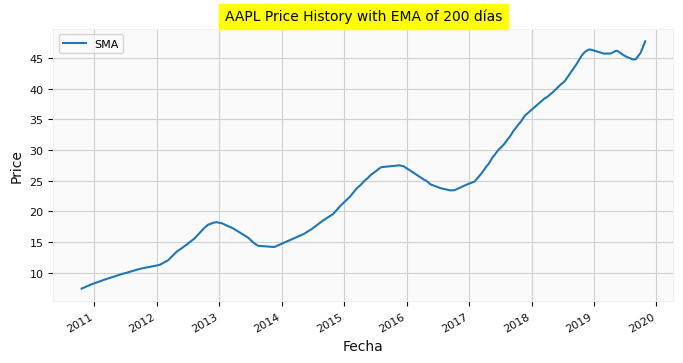

In [18]:
# Función para calcular la EMA
def get_EMA(df, n, value_name):
    EMA = pd.Series(df['Close'].ewm(span=periods, adjust=False).mean(), name ='SMA_' + str(n))
    df = df.join(EMA)
    return df 

def get_EMA_plot( df, n):   
    df_sma.plot(figsize = (8, 4), lw=1.5);  

    plt.title(value_name + f" Price History with EMA of {periods} días",fontsize=10, backgroundcolor='yellow')
    plt.xlabel('Fecha',fontsize=10)
    plt.ylabel('Price',fontsize=10)
    plt.legend(loc='upper left',fontsize=8)

    # Ajustar tamaño de las fechas en la escala x
    plt.gca().xaxis.set_tick_params(labelsize=8)

    # Ajustar tamaño de los números en la escala y
    plt.gca().yaxis.set_tick_params(labelsize=8)
    plt.show()    

periods = 200
df = df_close.copy()
datos_ema = get_EMA(df, periods, value_name)

# Plot graphic
get_EMA_plot(datos_ema, periods )
 


### Clase para calcular y graficar la EMA.

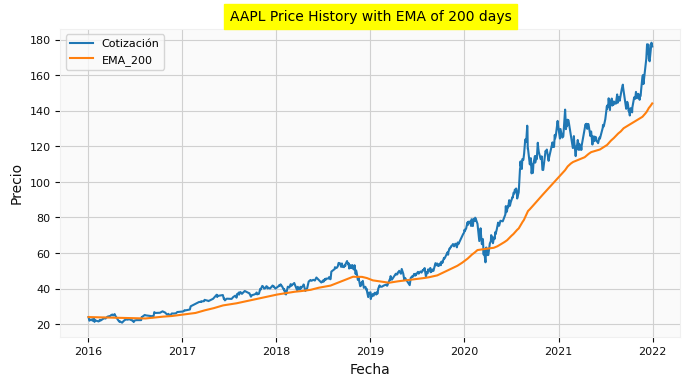

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

class Calcula_plot_EMA:
    def __init__(self, periods):
        self.periods = periods

    def calculate_EMA(self, df):
        EMA = pd.Series(df['Close'].ewm(span=self.periods, adjust=False).mean(), name='EMA_' + str(self.periods))
        df = df.join(EMA)
        return df

    def plot_EMA(self, df, value_name):
        plt.figure(figsize=(8, 4))
        plt.plot(df.index, df['Close'], label='Cotización', lw=1.5)
        plt.plot(df.index, df['EMA_' + str(self.periods)], label='EMA_' + str(self.periods), lw=1.5)
        plt.title(value_name + f" Price History with EMA of {self.periods} days", fontsize=10, backgroundcolor='yellow')
        plt.xlabel('Fecha', fontsize=10)
        plt.ylabel('Precio', fontsize=10)
        plt.legend(loc='upper left', fontsize=8)
        
        # Ajustar tamaño de las fechas en la escala x
        plt.gca().xaxis.set_tick_params(labelsize=8)
    
        # Ajustar tamaño de los números en la escala y
        plt.gca().yaxis.set_tick_params(labelsize=8)
        plt.show()

# Parámetros
periods = 200
ema_calculator = Calcula_plot_EMA(periods)

df_ema = ema_calculator.calculate_EMA(datos_ema)
ema_calculator.plot_EMA(df_ema, value_name)


## Resúmen de llamadas a las funciones anteriores.
En adelante, usaremos estas sentencias para crear los dataFrames base de los análisis.

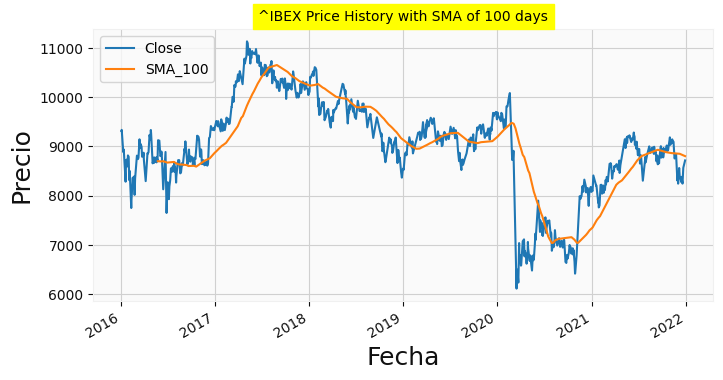

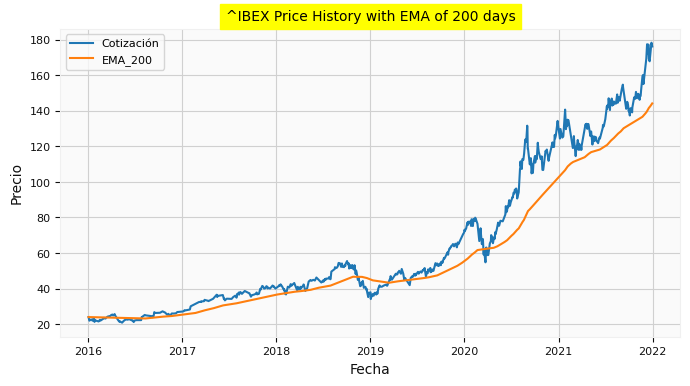

In [20]:
 # Conseguir cotizaciones.
investment_value = 100000.0

# Parámetros de análisis
ticker_val = '^IBEX'
value_name = 'IBEX'
start_date = "2016-01-04"
end_date = "2021-12-31"

# Importación de cotizaciones y cálculo de retornos
calc_ret = Calcula_retornos(ticker_val, start_date, end_date)
df_closes, df_close, value_name = calc_ret.download_quotes()
df_returns = calc_ret.calculate_variations()

# Parámetros
periods = 100

calcula_sma = calcula_plot_SMA(df_close, value_name, periods)
calcula_sma.plot_SMA()

# Cálculo de una EMA
periods = 200
ema_calculator = Calcula_plot_EMA(periods)

df_ema = ema_calculator.calculate_EMA(datos_ema)
ema_calculator.plot_EMA(df_ema, value_name)

## Modelo de estrategia con el cruce de una media móvil.

Este código implementa una estrategia simple de trading basada en medias móviles. Genera señales de compra y venta cuando el precio cruza la media móvil de 100 períodos y calcula los puntos de entrada y salida en función de esos cruces. Es importante tener en cuenta que esta es una estrategia básica de ejemplo.

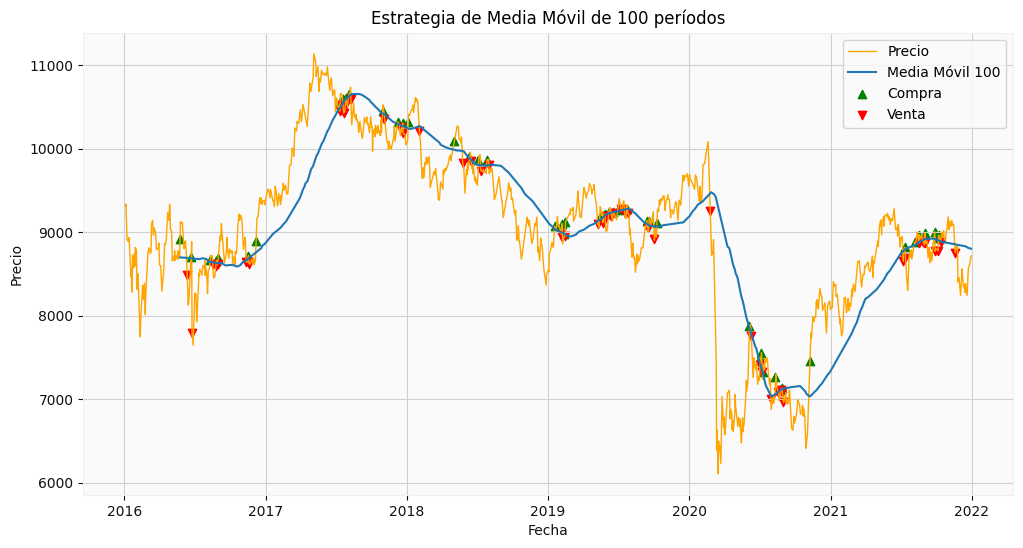

In [21]:
# Calcular la media móvil de 100 períodosdf_dalos = df
df_datos = df_close.copy()
ma_100 = df_datos['Close'].rolling(window=100).mean()

# Generar señales de compra y venta basadas en el cruce de la media móvil
df_datos['Signal'] = np.where(df_datos['Close'] > ma_100, 1, -1)

# Calcular los puntos de cruce de la señal
df_datos['Cross'] = df_datos['Signal'].diff()

# Generar señales de entrada y salida
df_datos['Entry'] = np.where(df_datos['Cross'] > 0, df_datos['Close'], np.nan)
df_datos['Exit'] = np.where(df_datos['Cross'] < 0, df_datos['Close'], np.nan)

# Graficar la Estrategia de Media Móvil de 100 períodos
plt.figure(figsize=(12, 6))
plt.plot(df_datos.index, df_datos['Close'], label='Precio', color='orange', lw=1)
plt.plot(df_datos.index, ma_100, label='Media Móvil 100', lw=1.5)
plt.scatter(df_datos.index, df_datos['Entry'], marker='^', color='green', label='Compra')
plt.scatter(df_datos.index, df_datos['Exit'], marker='v', color='red', label='Venta')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Estrategia de Media Móvil de 100 períodos')
plt.legend()
plt.grid(True)
plt.show()


**<uExplicación del código</u>**:

* **ma_100 = df_datos['Close'].rolling(window=100).mean()**: Calcula la media móvil de 100 períodos utilizando la función `rolling()` en el precio de cierre de las acciones. Esto crea una serie que representa la media móvil de 100 períodos.

* **df_datos['Signal'] = np.where(df_datos['Close'] > ma_100, 1, -1)**: Genera una columna llamada  `signal` en el DataFrame `df_datos`. Esta columna contiene 1 cuando el precio de cierre es mayor que la media móvil de 100 períodos (señal de compra) y -1 cuando es menor (señal de venta).

* **df_datos['Cross'] = df_datos['Signal'].diff()**: Calcula los puntos de cruce de la señal generada. Cuando el valor de `Signal` cambia de 1 a -1, significa que hay un cruce bajista (venta), y cuando cambia de -1 a 1, significa que hay un cruce alcista (compra). La función `diff()` calcula la diferencia entre valores adyacentes en la columna `Signal`.

* **df_datos['Entry'] = np.where(df_datos['Cross'] > 0, df_datos['Close'], np.nan)**: Genera una columna `Entry` que contiene el precio de cierre en el momento del cruce alcista. Esto indica el punto de entrada en una posición larga (compra). Si no hay un cruce alcista, se coloca np.nan (valor no válido) en la columna `Entry .

* **df_datos['Exit'] = np.where(df_datos['Cross'] < 0, df_datos['Close'], np.nan)**: Genera una columna `Exit` que contiene el precio de cierre en el momento del cruce bajista. Esto indica el punto de salida de una posición larga (venta). Si no hay un cruce bajista, se coloca np.nan en la columna `Exit`.

## Modelo de estrategia con el cruce de dos mediaws móviles.

In [4]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np

# Establecer el formato de punto flotante para imprimir dos decimales
pd.options.display.float_format = '{:.2f}'.format

def import_data():
    """Opción para solictar ticker y fechas"""
    #ticker = input("Introduce el ticker: ")
    #start_date = input("Introduce la fecha de inicio (YYYY-MM-DD): ")
    #end_date = input("Introduce la fecha de fin (YYYY-MM-DD): ")
    
    ticker = '^IBEX'
    start_date = '2010-1-4'
    end_date = '2019-10-29'
    
    # Crear el objeto Ticker para el símbolo deseado
    ticker = yf.Ticker("AAPL")
    value_name = ticker

    # Obtener el historial de precios utilizando la función history()
    df_closes = ticker.history(start= start_date, end="2019-10-23")

    # Formatear el índice como "yy-mm-dd"
    df_closes.index = df_closes.index.strftime('%y-%m-%d')

    # Convertir nuevamente el índice a un objeto DatetimeIndex
    df_closes.index = pd.to_datetime(df_closes.index, format='%y-%m-%d')
     
    df_close = df_closes[['Close']].copy(deep=True) 
    
    return df_closes, df_close, value_name

def calculate_ema(df, label, period):
    ema_column = label
    df[ema_column] = df["Close"].ewm(span=period, adjust=False).mean()

def perform_trading_strategy(datos):
    short_window = 100
    long_window = 200
    label_ma_short = 'EMA_' + str(short_window )
    label_ma_long = 'EMA_' + str(long_window )
    calculate_ema(datos, label_ma_short, short_window )
    calculate_ema(datos, label_ma_long, long_window)
    
    # Si se cumplen las condiciones compramos, si no vendemos.
    datos['Position'] = np.where(datos[label_ma_short] > datos[label_ma_long], 1, -1)
    # Si se cumplen las condiciones compramos, caso contrario nos mantenemos como estamos.
    #datos['Position'] = np.where(datos[label_ma_short] > datos[label_ma_long], 1, 0)
    
    # Puntos de cambio de 1 a -1 y viceversa
    datos['Entry_Exit'] = datos['Position'].diff()/2
    return datos

df_closes, df_close, value_name = import_data()

datos = perform_trading_strategy(df_close)

# Puntos de compra y venta.
datos[datos['Entry_Exit'] != 0].dropna()


Close  EMA_100  EMA_200  Position  Entry_Exit
Date                                                     
2010-01-05   6.49     6.48     6.48         1        1.00
2010-01-06   6.39     6.48     6.48        -1       -1.00
2010-03-26   6.99     6.44     6.44         1        1.00
2013-01-25  13.44    17.04    17.05        -1       -1.00
2013-10-24  16.56    14.77    14.77         1        1.00
2015-12-24  24.59    26.25    26.26        -1       -1.00
2016-09-20  26.29    24.02    24.01         1        1.00
2019-01-04  35.58    44.99    45.04        -1       -1.00
2019-04-17  48.95    44.06    44.03         1        1.00

## Otro modelo

Artículo recomendado : [Algorithmic-Trading-with-Python](https://github.com/Nikhil-Adithyan/Algorithmic-Trading-with-Python/tree/main/Overlap)  por Nikhil-Adithyan

In [6]:
import math
from math import floor
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
from datetime import datetime 
import matplotlib.pyplot as plt
#from termcolor import colored as cl
import plotly.express as px
from plotly.offline import iplot
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

#================================================================================
# Importar cotizaciones
def get_quotes(ticker, start_date, end_date):
    yfObj = yf.Ticker(ticker)
    #value_name = yfObj.info['shortName']
    value_name = ticker
    df_val = yf.download(ticker, start= start_date, end = end_date, progress=False)
    
    # Formatear el índice como "yy-mm-dd"
    df_val.index = df_val.index.strftime('%y-%m-%d')

    # Convertir nuevamente el índice a un objeto DatetimeIndex
    df_val.index = pd.to_datetime(df_val.index, format='%y-%m-%d')

    # Volver a convertir el índice en DatetimeIndex
    df_val.index = pd.to_datetime(df_val.index)

    #df_val.rename(columns={'Adj Close': value_name }, inplace=True)   
    df_value = df_val.copy(deep=True)
    df_value.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1 , inplace=True)
    return df_val, df_value, value_name

#======================================================================
# Parámetros del análisis
start_date = '2010-12-30'
end_date = '2019-10-29'
value_name = 'IBEX'  # nombre abreviado del valor
ticker = '^IBEX'
initial_investment = 100000
# Parámetros para las EMA's.
ema_short = 100
ema_long = 200
label_ema_short = 'EMA_' + str(ema_short)
label_ema_long = 'EMA_' + str(ema_long)

# Market quotes
df_val, df_value, value_name =  get_quotes(ticker, start_date, end_date) 

#================================================================================
# Calcular medias móviles exponenciales
quotes_df = df_value.copy()

def ema(data, n):
    ema = data.ewm(span=n, adjust=False).mean()
    return pd.DataFrame(ema)

n = [100, 200]
for i in n:
    quotes_df[f'EMA_{i}'] = ema(quotes_df['Close'], i)

#========================================================
def implement_strategy(data_df):

    # Calcular la media móvil exponencial.
    ema_short = data_df['Close'].ewm(span=100, adjust=False).mean()
    ema_long = data_df['Close'].ewm(span=200, adjust=False).mean()

    # Generar señales de entrada y salida.
    entry_exit = []
    for i in range( len(data_df)):
        if ema_short.iloc[i] > ema_long.iloc[i]:
            entry_exit.append(1)  # Señal de compra.
        elif ema_long.iloc[i] > ema_short.iloc[i]:
            entry_exit.append(-1)  # Señal de venta.
        else:
            entry_exit.append(0)  # Señal de mantener.

    # Crear un DataFrame con los resultados
    results_df = pd.DataFrame({
        'Close': data_df['Close'],
        label_ema_short : ema_short,
        label_ema_long : ema_long,
        'Entry_Exit': entry_exit
    })

    return results_df

results_df = implement_strategy(df_value)


# Filtrar el DataFrame para mantener solo las filas donde cambia la posición.
#buy_sell_signals = results_df[results_df['Entry_Exit'].diff(1) != 0]

#results_df[results_df['Entry_Exit'] != 0]

buy_sell_signals = (results_df[(results_df['Entry_Exit'] != results_df['Entry_Exit'].shift(1)) & 
                                                                (results_df['Entry_Exit'] != 0)])
buy_sell_signals

Close  EMA_100  EMA_200  Entry_Exit
Date                                             
2011-01-03  9888.30  9859.68  9859.39           1
2011-01-05  9801.40  9859.08  9859.10          -1
2011-01-14 10385.10  9863.08  9860.74           1
2011-07-19  9443.80 10215.70 10218.20          -1
2012-12-20  8264.20  7720.04  7715.81           1
2015-09-09 10037.80 10840.48 10841.65          -1
2017-01-06  9515.90  8954.55  8952.18           1
2018-02-28  9840.30 10170.74 10171.73          -1

**<u>Explicación del código:</u>**

    # Filter the DataFrame to keep only the rows where the position changes.
    buy_sell_signals = results_df[results_df['Entry_Exit'].diff(1) != 0]

Esta sentencia tiene el problema de que no filtra la primera fila si en 'Enry_Exit' tenemos un 0.


    results_df[results_df['Entry_Exit'] != 0]

    filtered_result = results_df[(results_df['Entry_Exit'] != results_df['Entry_Exit'].shift(1)) & (results_df['Entry_Exit'] != 0)]


Estas sentencias funcionan de la siguiente manera:

La primera sentencia filtra todas las filas en las que 'Entry_Exit' es igual a 0.

En la segunda sentencia, la primera expresión booleana, results_df['Entry_Exit'] != results_df['Entry_Exit'].shift(1), filtrará el DataFrame para que solo queden las filas donde la diferencia entre los valores de Entry_Exit en filas consecutivas es diferente de 0. Esto significa que solo se quedarán las filas donde Entry_Exit cambia de valor.<br>
La segunda expresión booleana, results_df['Entry_Exit'] != 0, filtrará el DataFrame para que solo queden las filas donde Entry_Exit es diferente de 0. Esto significa que solo se quedarán las filas donde Entry_Exit es 1 o -1.

Estas dos expresiones booleanas se combinan con el operador & para garantizar que solo se queden las filas que cumplen con ambas condiciones.

En otras palabras, esta sentencia filtrará el DataFrame para que solo queden los registros en los que Entry_Exit pasa de 1 a -1 y viceversa.


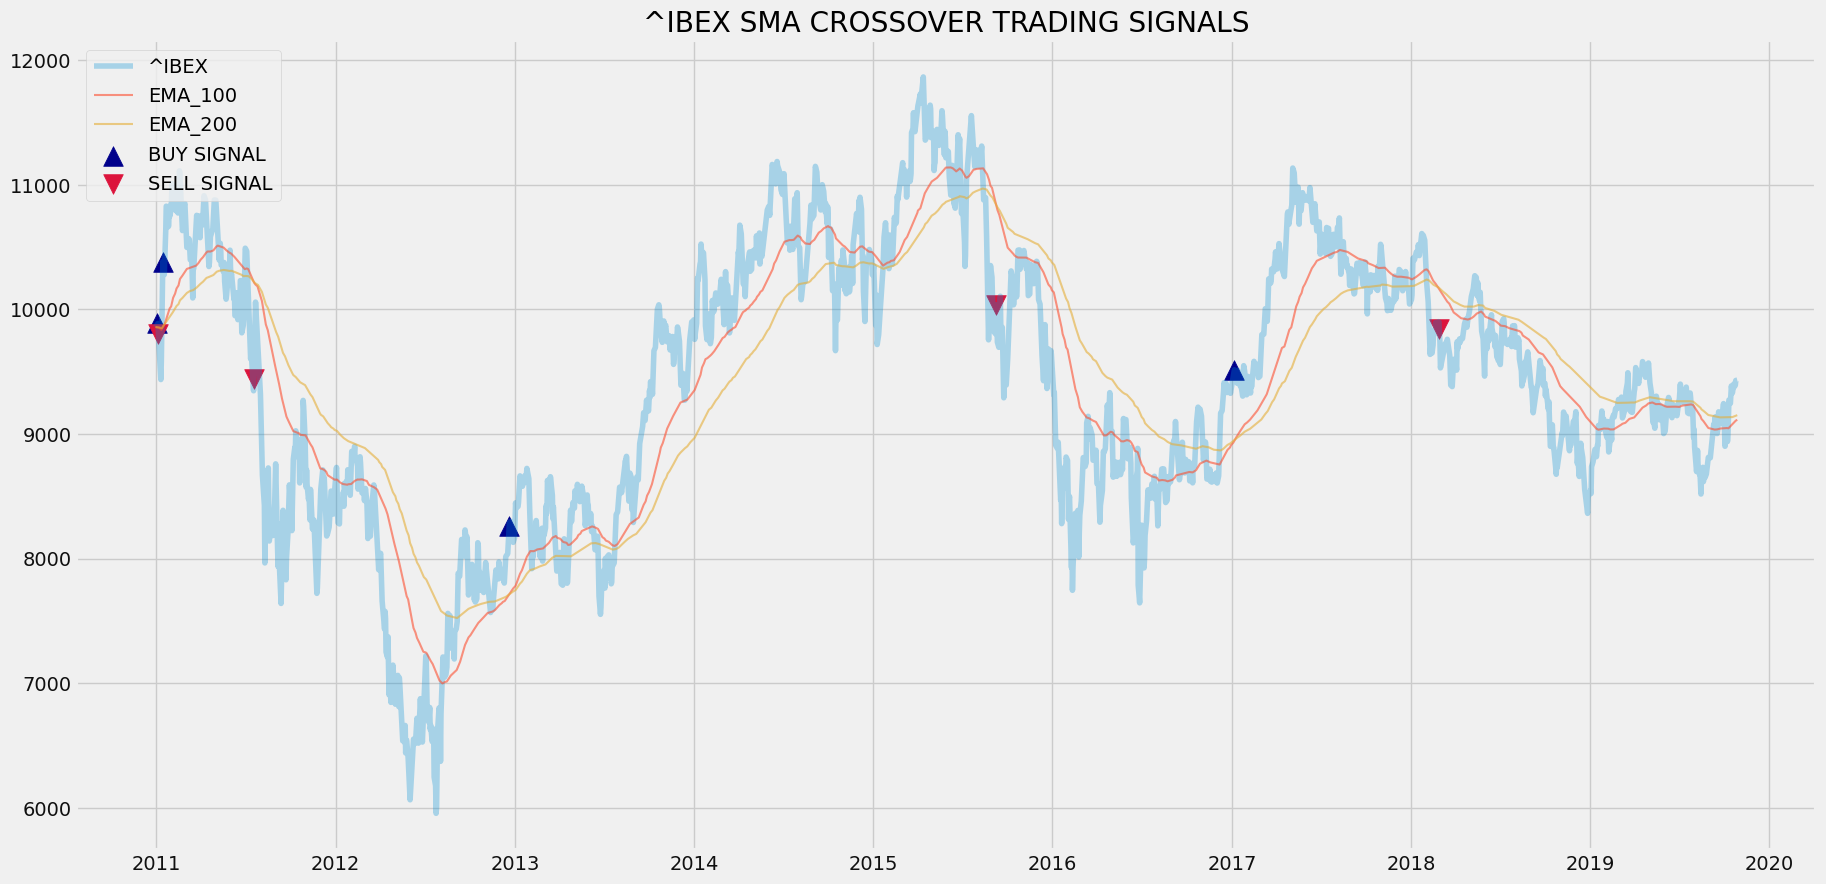

In [24]:
# Plot señales de trading

plt.plot(quotes_df['Close'], alpha = 0.3, label = value_name)
plt.plot(quotes_df[label_ema_short], alpha = 0.6, label = label_ema_short, lw=1.5)
plt.plot(quotes_df[label_ema_long], alpha = 0.6, label = label_ema_long, lw=1.5)

buy_price = buy_sell_signals[buy_sell_signals['Entry_Exit'] == 1]
sell_price = buy_sell_signals[buy_sell_signals['Entry_Exit'] == -1]

plt.scatter(buy_price.index, buy_price['Close'], marker = '^', s = 200, color = 'darkblue', label = 'BUY SIGNAL')
plt.scatter(sell_price.index, sell_price['Close'], marker = 'v', s = 200, color = 'crimson', label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title(f'{value_name} SMA CROSSOVER TRADING SIGNALS')
plt.show()


Retorno de la estrategia: 2466.701171875
Retorno del mercado: -426.099609375


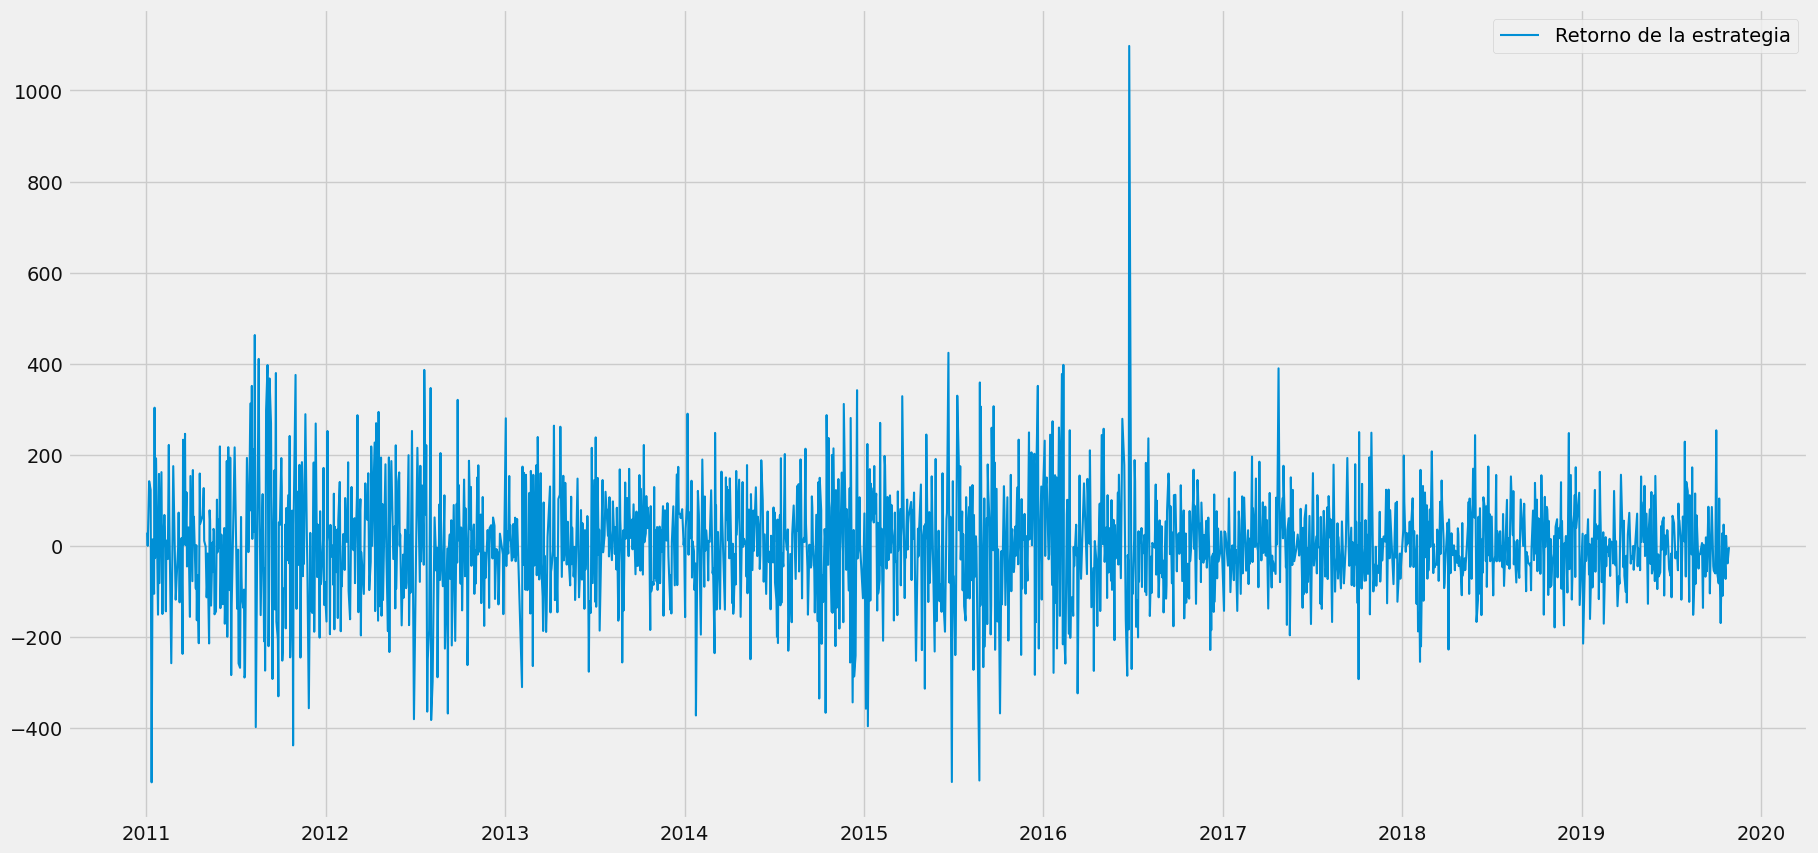

In [25]:
# Plot retornos del mercado y de la estrategia
import pandas as pd
import matplotlib.pyplot as plt


# Calcular el retorno de la estrategia
strategy_returns = results_df['Close'].diff(1) * results_df['Entry_Exit']

# Calcular el retorno del mercado
market_returns = results_df['Close'].diff(1)

# Imprimir el resultado de la estrategia
print('Retorno de la estrategia:', strategy_returns.sum())

# Imprimir el retorno del mercado
print('Retorno del mercado:', market_returns.sum())

# Graficar el retorno de la estrategia y del mercado
plt.plot(strategy_returns, label='Retorno de la estrategia', lw=1.5)
#plt.plot(market_returns, label='Retorno del mercado', lw=1.5)
plt.legend()
plt.show()

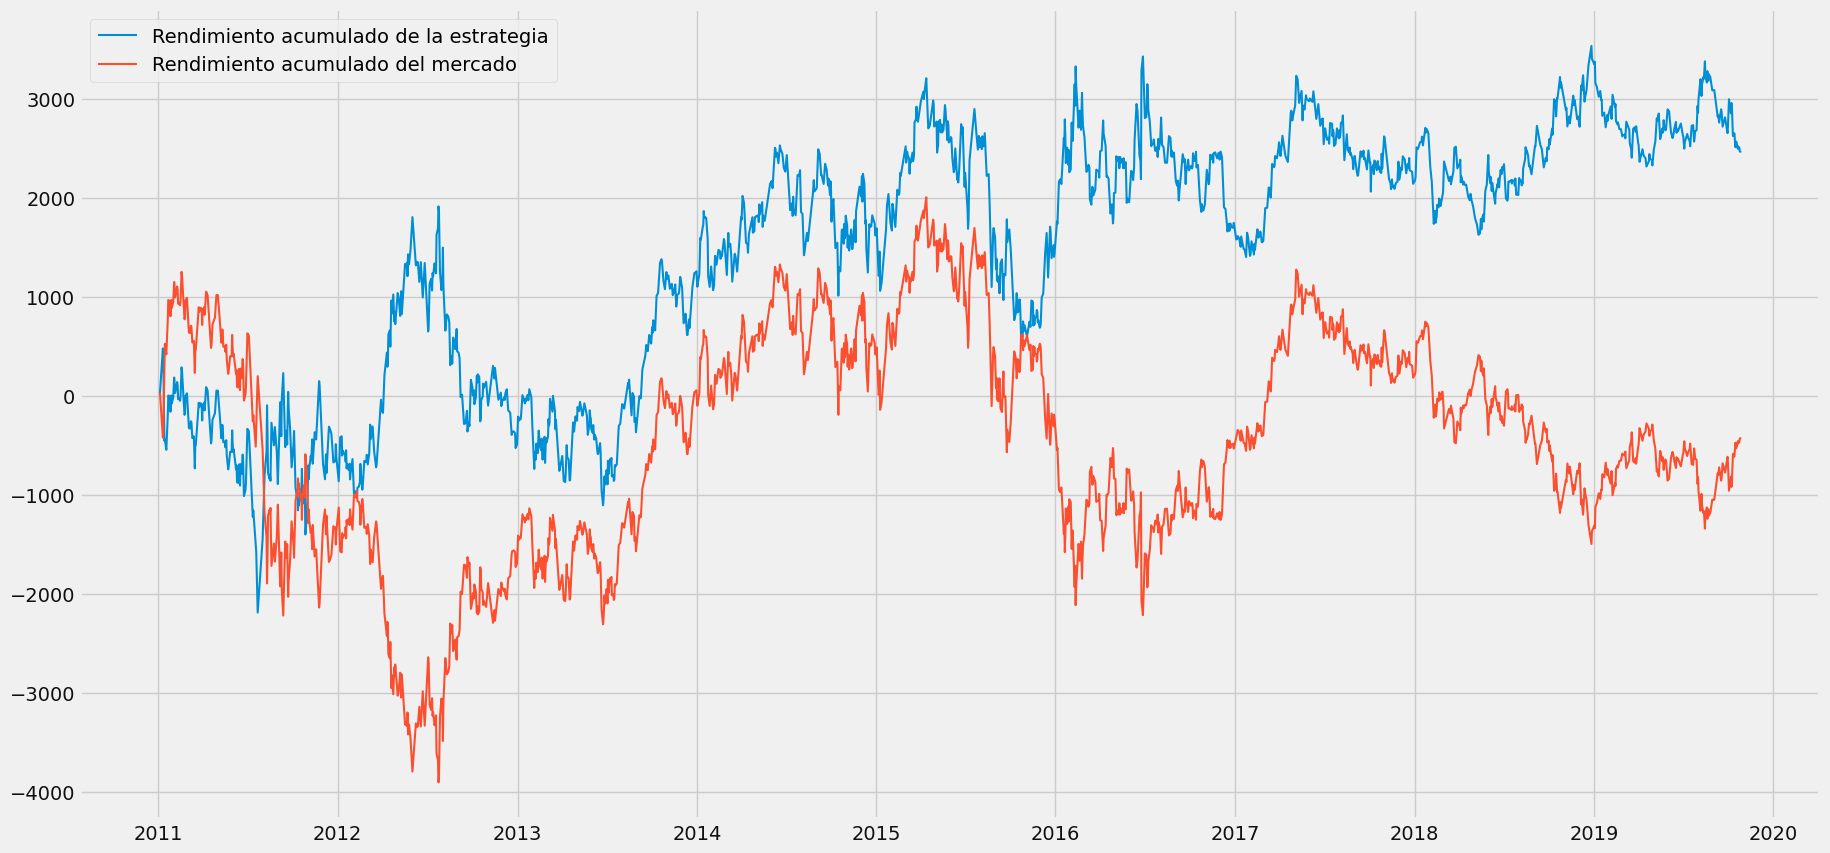

In [26]:
# Plot retornos acumulados del mercado y de la estrategia.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el retorno de la estrategia
strategy_returns = results_df['Close'].diff(1) * results_df['Entry_Exit']

# Calcular el retorno del mercado
market_returns = results_df['Close'].diff(1)

# Calcular el rendimiento acumulado de la estrategia
strategy_returns_cumsum = strategy_returns.cumsum()

# Calcular el rendimiento acumulado del mercado
market_returns_cumsum = market_returns.cumsum()

# Graficar el rendimiento acumulado de la estrategia y del mercado
plt.plot(strategy_returns_cumsum, label='Rendimiento acumulado de la estrategia', lw=1.5)
plt.plot(market_returns_cumsum, label='Rendimiento acumulado del mercado', lw=1.5)
plt.legend()
plt.show()


Es importante tener en cuenta que la función `cumsum()` no tiene en cuenta el hecho de que los rendimientos son compuestos. Esto significa que el rendimiento de cada período se reinvierte en el siguiente período. Esta función no tiene en cuenta este hecho, por lo que el rendimiento acumulado puede ser inexacto.

En el caso del gráfico proporcionad, el rendimiento acumulado es significativo en el segundo período. Por lo tanto, la función `cumsum()` proporcionará un resultado preciso.

Sin embargo, en algunos casos, la función `cumprod()` puede ser más precisa que la función cumsum(). Por ejemplo, si el gráfico comienza en el primer período, la función `cumprod()` proporcionará un resultado más preciso porque tendrá en cuenta el rendimiento acumulado del primer período.

En conclusión, la función `cumsum()` es una forma válida de calcular el rendimiento acumulado. Sin embargo, es importante tener en cuenta sus limitaciones.

In [27]:
market_returns_cumsum[-1]

-426.099609375

In [28]:
strategy_returns_cumsum[-1]

2466.701171875

### Rendimiento de la estrategia.
Con este script vemos la evolución del capital invertido. En cada posición de compra recomendada por la estrategia, se invierte todo el dinero disponible en ese momento.

In [7]:
# Establecer el formato de punto flotante para imprimir dos decimales
pd.options.display.float_format = '{:.2f}'.format
def get_profits(df, initial_capital):
    df.dropna(inplace=True)
    # Regenerar el índice de las filas comenzando desde 0
    df.reset_index(drop=True, inplace=True)

    df['Shares'] = 0.0
    df['Remainder'] = 0.0

    if df.loc[0, 'Entry_Exit'] == -1:
        df.loc[0, 'Shares'] = 0
        df.loc[0, 'Remainder'] = initial_capital
        df.loc[0, 'Capital_total'] = initial_capital
        
    elif df.loc[0, 'Entry_Exit'] == 1:
        df.loc[0, 'Shares'] = initial_capital // df.loc[0, 'Close']
        df.loc[0, 'Remainder'] = initial_capital - (df.loc[0, 'Shares'] * df.loc[0, 'Close'])
        df.loc[0, 'Capital_total'] = df.loc[0, 'Remainder'] + (df.loc[0, 'Shares'] * df.loc[0, 'Close'])
        
    else :
        df.loc[0, 'Shares'] = 0
        df.loc[0, 'Remainder'] = initial_capital
        df.loc[0, 'Capital_total'] = initial_capital

    for i in range(1, len(df)):
        if df.loc[i, 'Entry_Exit'] == -1:
            # Vendemos las acciones.
            df.loc[i, 'Remainder'] = df.loc[i - 1, 'Remainder'] + df.loc[i - 1, 'Shares'] * df.loc[i, 'Close']
            df.loc[i, 'Capital_total'] = df.loc[i, 'Remainder']
            df.loc[i, 'Shares'] = 0

        elif df.loc[i, 'Entry_Exit'] == 1:
            # Compramos acciones.
            df.loc[i, 'Shares'] = df.loc[i - 1, 'Remainder'] // df.loc[i, 'Close']
            df.loc[i, 'Remainder'] = df.loc[i - 1, 'Remainder'] - (df.loc[i, 'Shares'] * df.loc[i, 'Close'])
            df.loc[i, 'Capital_total'] = df.loc[i, 'Close'] * df.loc[i, 'Shares'] + df.loc[i, 'Remainder']

        else:
            df.loc[i, 'Remainder'] = df.loc[i - 1, 'Remainder']
            df.loc[i, 'Shares'] = df.loc[i - 1, 'Shares']
            df.loc[i, 'Capital_total'] = df.loc[i, 'Close'] * df.loc[i, 'Shares'] + df.loc[i, 'Remainder']

    return df

initial_capital = 100000

df = buy_sell_signals.copy()
df = get_profits(df, initial_capital)

# Imprimir información del DataFrame resultante
df 


Close  EMA_100  EMA_200  Entry_Exit  Shares  Remainder  Capital_total
0  9888.30  9859.68  9859.39           1   10.00    1117.00      100000.00
1  9801.40  9859.08  9859.10          -1    0.00   99131.01       99131.01
2 10385.10  9863.08  9860.74           1    9.00    5665.11       99131.01
3  9443.80 10215.70 10218.20          -1    0.00   90659.31       90659.31
4  8264.20  7720.04  7715.81           1   10.00    8017.31       90659.31
5 10037.80 10840.48 10841.65          -1    0.00  108395.30      108395.30
6  9515.90  8954.55  8952.18           1   11.00    3720.40      108395.30
7  9840.30 10170.74 10171.73          -1    0.00  111963.70      111963.70

# Nota de advertencias.
Este notebook tiene fines educativos y de demostración solamente. Las estrategias de inversión presentadas aquí son ejemplos y pueden contener errores. Se recomienda encarecidamente que cualquier decisión de inversión se tome después de consultar con un asesor financiero calificado. No se proporciona asesoramiento financiero, y cualquier uso de la información presentada es bajo su propio riesgo. Agradecemos cualquier retroalimentación para mejorar la calidad de estos ejemplos.  
Es importante recordar que no hay una estrategia única que funcione en todos los casos, y siempre hay un riesgo asociado con la inversión. Es recomendable realizar pruebas exhaustivas y análisis antes de implementar cualquier estrategia en un entorno de trading real.